In [15]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [16]:
def changev(x):
    if x == '学三':
        return 1
    elif x == '学二':
        return 2
    elif x == '学一':
        return 3
    elif x == '国励':
        return 4
    elif x == '国奖':
        return 5
    else:
        return 0

In [17]:
data_path='./data2.xlsx'
data = pd.read_excel(data_path)
data['性别'] = data['性别'].apply(lambda x:1 if x == '男'  else 0)
data['奖学金'] = data['奖学金'].apply(changev)
data.head()


,Unnamed: 0,性别,现在专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,...,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部,奖学金
0,0,0,26,1,87.6327,1,72.15,4.0,0,18,...,1,0,0,0,0,0,0,0,0,1
1,1,0,26,2,89.9434,1,70.50,3.0,0,18,...,1,0,0,0,0,0,0,0,0,1
2,2,0,26,3,88.4667,1,NaN,NaN,0,18,...,1,0,0,0,0,0,0,0,0,1
3,3,1,52,2,86.3803,1,76.40,NaN,0,6,...,1,0,0,0,0,0,0,0,0,1
4,4,1,52,3,87.5455,1,NaN,5.0,0,6,...,1,0,0,0,0,0,0,0,0,2


In [18]:
print(data.columns)

Index(['Unnamed: 0', '性别', '现在专业', '考试学年', '智育成绩', '是否参与本学年评奖', '体测总分', '借书总数',
       '论文数量', '思想成长', '实践实习', '志愿公益', '学术创新', '文化活动', '体育活动评价成绩', '青学之星',
       '三好学生', '文体积极分子', '学生组织优秀个人', '学习进步奖', '优秀团干部', '优秀团员', '优秀学生干部奖',
       '“双培计划”学习进步奖', '“双培计划”优秀学生干部', '奖学金'],
      dtype='object')


In [19]:
X=data.iloc[:,1:25]
Y=data.iloc[:,25]

In [20]:
Y.head()

0    1
1    1
2    1
3    1
4    2
Name: 奖学金, dtype: int64

In [21]:
X.head()

,性别,现在专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [22]:
# X = X.drop('“双培计划”学习进步奖', axis=1)
# X = X.drop('青学之星', axis=1)
# X = X.drop('“双培计划”优秀学生干部', axis=1)
# X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

In [23]:
X.head()

,性别,现在专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
x_train, x_test, y_train, y_test = X, X, Y, Y

In [25]:
xgb_train=xgb.DMatrix(X_train,label=y_train)
xgb_test=xgb.DMatrix(X_test,label=y_test)

XGBoostError: [04:32:19] ../src/data/data.cc:455: Check failed: this->labels.Size() % this->num_row_ == 0 (4261 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x1fcff9) [0x7f00e6056ff9]
  [bt] (1) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x209eb2) [0x7f00e6063eb2]
  [bt] (2) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x20bb90) [0x7f00e6065b90]
  [bt] (3) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xad) [0x7f00e5f839cd]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.7(+0x6ff5) [0x7f012c898ff5]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.7(+0x640a) [0x7f012c89840a]
  [bt] (6) /home/codespace/.python/current/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x12f51) [0x7f012c8baf51]
  [bt] (7) /home/codespace/.python/current/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xca11) [0x7f012c8b4a11]
  [bt] (8) /home/codespace/.python/current/bin/python3(_PyObject_MakeTpCall+0x8c) [0x55add8baec2c]



In [26]:
import sklearn.metrics as metrics
def f1(preds, dtrain):
    y_train = dtrain.get_label() # 'numpy.ndarray'
    y_pred = [np.argmax(d) for d in preds]
    return 'f1', metrics.f1_score(y_train, y_pred, average='weighted')

In [27]:
# params={
#     'objective':'multi:softmax',
#     'eta':0.1,
#     'max_depth':7,
#     # 'n_estimators':500,
#     'num_class':6,
#     'alpha': 0.6,
#     'lambda': 1.4,
#     'colsample_bytree':0.97,
#     'min_child_weight':0.5,
#     'gamma':0.015,
# }
from xgboost import XGBClassifier
bst = XGBClassifier(
    max_depth=7,
    min_child_weight=4,
    gamma= 0,
    subsample=0.8,
    colsample_bytree=0.8,
    # scale_pos_weight=1,
    learning_rate=0.1, 
    n_estimators=500,
    seed=1)
# watchlist=[(xgb_train,'train'),(xgb_test,'test')]
# num_round=100
# grid = GridSearchCV(bst, param_grid=params, cv=10, scoring='f1_weighted')
# grid.fit(x_train, y_train)

# print(grid.best_params_)
# print(grid.best_score_)
# bst=xgb.train(params,xgb_train,num_round,watchlist,feval=f1)
kfold = StratifiedKFold(n_splits=10, random_state=7,shuffle=True)
results = cross_val_score(bst, X_train, y_train, cv=kfold,scoring='f1_weighted')#对数据进行十折交叉验证--9份训练，一份测试
print(results)
print(results.mean())

ValueError: Found input variables with inconsistent numbers of samples: [12780, 17041]

In [ ]:
pred=bst.predict(xgb_test)
print(pred)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
#模型评估

error_rate=np.sum(pred!=y_test)/y_test.shape[0]
print('测试集错误率(softmax):{}'.format(error_rate))
accuray=1-error_rate
print('测试集准确率：%.4f' %accuray)
print('f1-score:', metrics.f1_score(y_test, pred, average='weighted'))

pred=bst.predict(xgb_train)
error_rate=np.sum(pred!=y_train)/y_train.shape[0]
print('训练集错误率(softmax):{}'.format(error_rate))
accuray=1-error_rate
print('训练集准确率：%.4f' %accuray)


测试集错误率(softmax):0.25463506219197374
测试集准确率：0.7454
f1-score: 0.7337743937967949
训练集错误率(softmax):0.13200312989045385
训练集准确率：0.8680


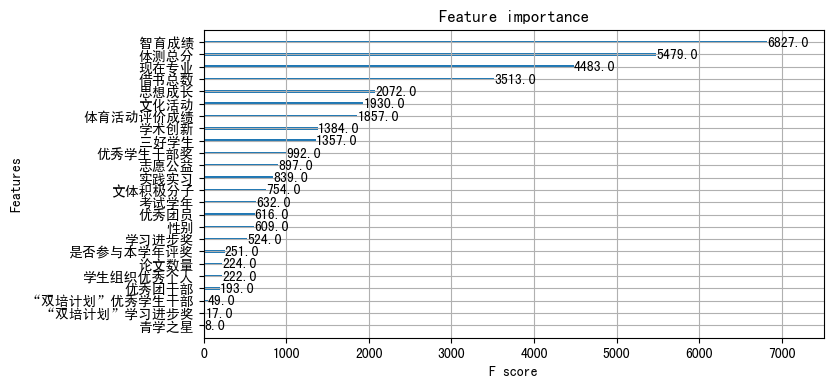

In [ ]:
import matplotlib.pyplot as plt
# 中文乱码解决方法
plt.rcParams["font.sans-serif"] = ["SimHei"]
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()